In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import time

In [55]:
from olsmax import OLSMax
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

# Load data

Data shape: (442, 10) | Target shape: (442,)


Text(0.5, 1.0, 'Corrmat')

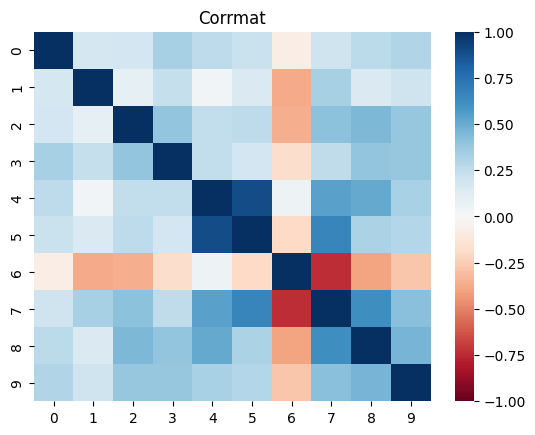

In [58]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
    test_size=0.2, random_state=42
)
print("Data shape:", X.shape, "| Target shape:", y.shape)
sns.heatmap(pd.DataFrame(X).corr(), cmap='RdBu', vmin=-1, vmax=1)
plt.title("Corrmat")

# Accuracy comparison

In [59]:
# OLSMax pinv
model_pinv = OLSMax(fit_intercept=True)
model_pinv.fit(X_train, y_train, method='pinv')
train_pred_pinv = model_pinv.predict(X_train)
test_pred_pinv  = model_pinv.predict(X_test)
r2_train_pinv = r2_score(y_train, train_pred_pinv)
r2_test_pinv  = r2_score(y_test,  test_pred_pinv)

# OLSMax qr
model_qr = OLSMax(fit_intercept=True)
model_qr.fit(X_train, y_train, method='qr')
r2_train_qr = r2_score(y_train, model_qr.predict(X_train))
r2_test_qr  = r2_score(y_test,  model_qr.predict(X_test))

# OLSMax svd
model_svd = OLSMax(fit_intercept=True)
model_svd.fit(X_train, y_train, method='svd')
r2_train_svd = r2_score(y_train, model_svd.predict(X_train))
r2_test_svd  = r2_score(y_test,  model_svd.predict(X_test))

# Sklearn
lr = LinearRegression()
lr.fit(X_train, y_train)
train_pred_lr = lr.predict(X_train)
test_pred_lr  = lr.predict(X_test)
r2_train_lr = r2_score(y_train, train_pred_lr)
r2_test_lr  = r2_score(y_test,  test_pred_lr)

# Statsmodels
X_train_sm = sm.add_constant(X_train)
X_test_sm  = sm.add_constant(X_test)
model_sm = sm.OLS(y_train, X_train_sm).fit()
train_pred_sm = model_sm.predict(X_train_sm)
test_pred_sm  = model_sm.predict(X_test_sm)
r2_train_sm = r2_score(y_train, train_pred_sm)
r2_test_sm  = r2_score(y_test,  test_pred_sm)

print("\n=== Single-run R^2 Comparison ===")
print(f"OLSMax (pinv)   : Train={r2_train_pinv:.4f}, Test={r2_test_pinv:.4f}")
print(f"OLSMax (qr)     : Train={r2_train_qr:.4f}, Test={r2_test_qr:.4f}")
print(f"OLSMax (svd)    : Train={r2_train_svd:.4f}, Test={r2_test_svd:.4f}")
print(f"Sklearn         : Train={r2_train_lr:.4f},  Test={r2_test_lr:.4f}")
print(f"Statsmodels     : Train={r2_train_sm:.4f}, Test={r2_test_sm:.4f}")



=== Single-run R^2 Comparison ===
OLSMax (pinv)   : Train=0.5279, Test=0.4526
OLSMax (qr)     : Train=0.5279, Test=0.4526
OLSMax (svd)    : Train=0.5279, Test=0.4526
Sklearn         : Train=0.5279,  Test=0.4526
Statsmodels     : Train=0.5279, Test=0.4526


# Performance and robustness comparison

In [64]:
N_RUNS = 10000  

times = {
    'OLSMax pinv' : [],
    'OLSMax qr'   : [],
    'OLSMax svd'  : [],
    'Sklearn'     : [],
    'Statsmodels' : []
}

for i in range(N_RUNS):
    # OLSMax pinv
    start = time.perf_counter()
    model = OLSMax(fit_intercept=True)
    model.fit(X_train, y_train, method='pinv')
    end = time.perf_counter()
    times['OLSMax pinv'].append(end - start)

    # OLSMax qr
    start = time.perf_counter()
    model = OLSMax(fit_intercept=True)
    model.fit(X_train, y_train, method='qr')
    end = time.perf_counter()
    times['OLSMax qr'].append(end - start)

    # OLSMax svd
    start = time.perf_counter()
    model = OLSMax(fit_intercept=True)
    model.fit(X_train, y_train, method='svd')
    end = time.perf_counter()
    times['OLSMax svd'].append(end - start)

    # Sklearn
    start = time.perf_counter()
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    end = time.perf_counter()
    times['Sklearn'].append(end - start)

    # Statsmodels
    start = time.perf_counter()
    model_sm = sm.OLS(y_train, X_train_sm).fit()
    end = time.perf_counter()
    times['Statsmodels'].append(end - start)

# Compute mean and std for each method
avg_times = {k: np.mean(v) for k, v in times.items()}
std_times = {k: np.std(v)  for k, v in times.items()}

print(f"\n=== Average fitting times over {N_RUNS} runs ===")
for method_name, tval in avg_times.items():
    print(f"{method_name:12s} : {tval:.6f} sec")

print(f"\n=== Average std times over {N_RUNS} runs ===")
for method_name, tval in std_times.items():
    print(f"{method_name:12s} : {tval:.6f} sec")


=== Average fitting times over 10000 runs ===
OLSMax pinv  : 0.000287 sec
OLSMax qr    : 0.000311 sec
OLSMax svd   : 0.000208 sec
Sklearn      : 0.001222 sec
Statsmodels  : 0.000595 sec

=== Average std times over 10000 runs ===
OLSMax pinv  : 0.000109 sec
OLSMax qr    : 0.000852 sec
OLSMax svd   : 0.000092 sec
Sklearn      : 0.000457 sec
Statsmodels  : 0.000225 sec


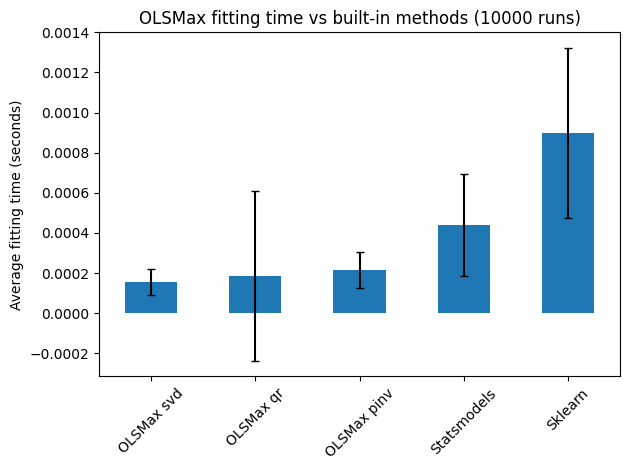

In [61]:
avg_series = pd.Series(avg_times)
std_series = pd.Series(std_times)
avg_series = avg_series.sort_values()
std_series = std_series.loc[avg_series.index]

avg_series.plot.bar(
    yerr=std_series,    # add error bars
    ecolor='black',     
    capsize=3           
)
plt.ylabel("Average fitting time (seconds)")
plt.title(f"OLSMax fitting time vs built-in methods ({N_RUNS} runs)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comments

- All methods yield the same train/test $R^2$, validating that they compute the identical OLS solution. 
- OLSMax methods have the fastest average fitting times 
- OLSMax QR and scikit-learn are less robust than other methods with higher std fitting times 